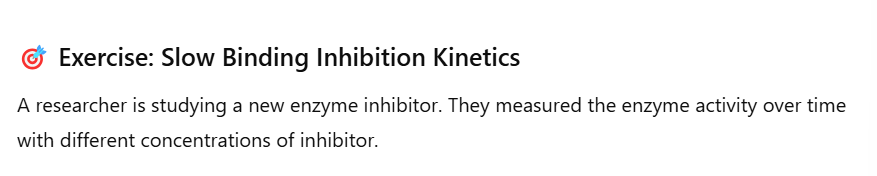
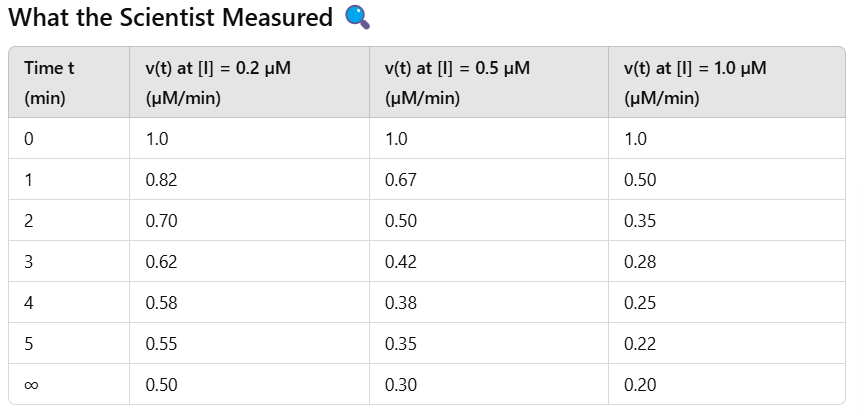
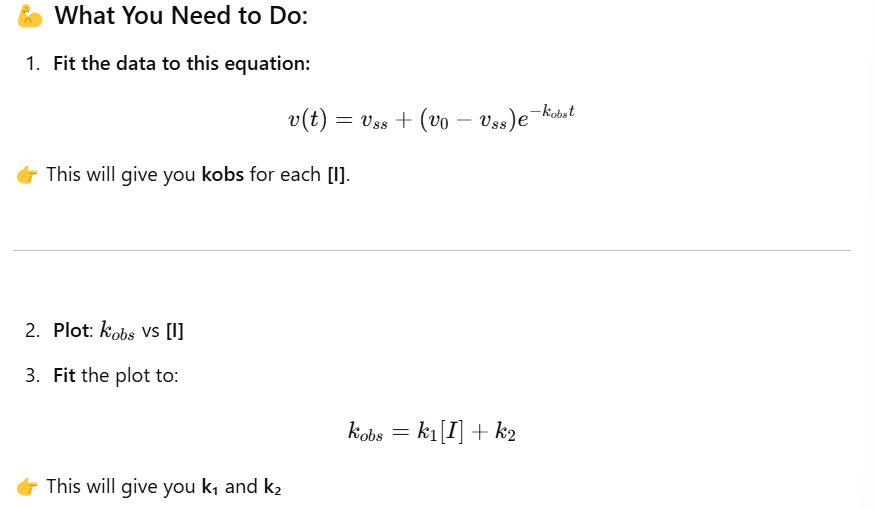
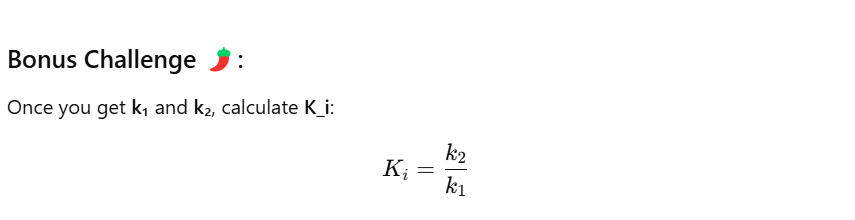

In [2]:
import numpy as np

t = np.array([0, 1, 2, 3, 4, 5]) #min
v_02 = np.array([1.0, 0.82, 0.70, 0.62, 0.58, 0.55]) #[I] = 0.2 µM, µM/min
v_05 = np.array([1.0, 0.67, 0.50, 0.42, 0.38, 0.35]) #[I] = 0.5 µM
v_10 = np.array([1.0, 0.50, 0.35, 0.28, 0.25, 0.22]) #[I] = 1.0 µM
I = np.array([0.2, 0.5, 1.0]) # µM

In [5]:
from scipy.optimize import curve_fit
def func(t, vss, kobs):    
    return vss + (v0-vss)*np.exp(-kobs*t)
all_v=[v_02, v_05,v_10]
vss_list=[]
kobs_list=[]
for i, v in enumerate(all_v):
    v0 = v[0]
    popt, _ = curve_fit(func, xdata=(t), ydata=v, p0=(1,1))
    vss_list.append(popt[0])
    kobs_list.append(popt[1])

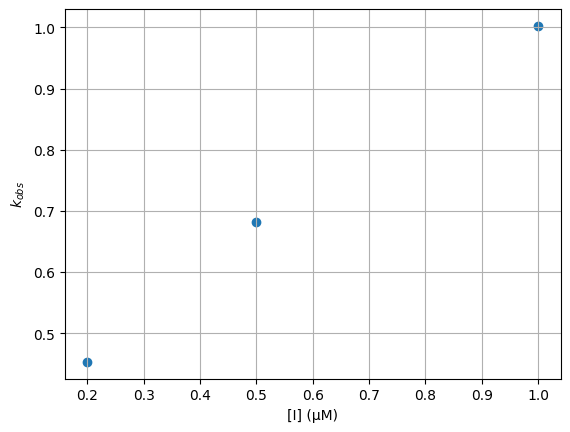

In [12]:
import matplotlib.pyplot as plt
plt.scatter(I, kobs_list)
plt.xlabel('[I] (µM)')
plt.ylabel(r'$k_{obs}$');
plt.grid(True)

In [20]:
def kobs(I, k1,k2):
    return k1*I+k2
popt, _ = curve_fit(kobs, I, kobs_list, p0=(1,1))
k1, k2 = popt
K_i=k2/k1
print(f'k1 = {k1:.3f}\nk2 = {k2:.3f}\nK_i = {K_i:.3f}')

k1 = 0.682
k2 = 0.326
K_i = 0.478
